# **House Price Prediction Using Random Forest Regression**

This notebook is about data visualization, pre-processing the data and predicting the price of house.

# Reading the dataset using Pandas
The training and testing dataset are read using read_csv function of Pandas library.

In [1]:
import pandas as pd
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
y = train['SalePrice']
train = train.drop(['SalePrice'], axis=1)
df = pd.concat([train, test])
df = df.drop(['Id'], axis=1)
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Checking the Null values
The dataset contains NaN values which needs to be filled properly.

In [2]:
df['Alley'] = df['Alley'].fillna('No alley access')
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['FireplaceQu'] = df['FireplaceQu'].fillna('FireplaceQu')
df['GarageType'] = df['GarageType'].fillna('No Garbage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garbage')
df['GarageQual'] = df['GarageQual'].fillna('No Garbage')
df['GarageCond'] = df['GarageCond'].fillna('No Garbage')
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['Fence'] = df['Fence'].fillna('No Fence')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,MnPrv,Shed,700,7,2006,WD,Normal


# Handling missing values with taking new feature
There are some features where many data are missing. In order to tackle that a new column corresponding to that column is made where the data in the new column is True if it is Null in that column else it is False. It will keep track that the data was missing.

In [3]:
df = df.drop(['MiscFeature'], axis=1)
missing_cols = []
for x in df:
    if df[x].isnull().sum()>400:
        missing_cols.append(x)
for x in missing_cols:
    df[x+'_missing'] = df[x].isnull()
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_missing
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,2,2008,WD,Normal,False
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,0,5,2007,WD,Normal,False
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,9,2008,WD,Normal,False
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,0,2,2006,WD,Abnorml,False
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,0,12,2008,WD,Normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,6,2006,WD,Normal,False
1455,160,RM,21.0,1894,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,4,2006,WD,Abnorml,False
1456,20,RL,160.0,20000,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,9,2006,WD,Abnorml,False
1457,85,RL,62.0,10441,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,MnPrv,700,7,2006,WD,Normal,False


In [4]:
missing_cols

['LotFrontage']

# Filling the Null/ Missing Values
The columns of the dataset still has missing values. These values are filled using the Mode and Mean of data. For the categorical data, the missing values are filled with the Mode of the data for that particular feature and for continuous data, it is filled with the mean value.

In [5]:
for x in df:
    if any(df[x].isnull()):
        if df[x].dtype == 'object' or df[x].dtype == 'bool':
            df[x] = df[x].fillna(df[x].mode()[0])
        else:
            df[x] = df[x].fillna(df[x].mean())
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_missing
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,2,2008,WD,Normal,False
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,0,5,2007,WD,Normal,False
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,9,2008,WD,Normal,False
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,0,2,2006,WD,Abnorml,False
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,0,12,2008,WD,Normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,6,2006,WD,Normal,False
1455,160,RM,21.0,1894,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,4,2006,WD,Abnorml,False
1456,20,RL,160.0,20000,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,9,2006,WD,Abnorml,False
1457,85,RL,62.0,10441,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,MnPrv,700,7,2006,WD,Normal,False


In [6]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,178.626089,455.532750,169.176615,...,215.357904,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.000000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Categorical data to numeric data
The Ordinal encoding is a type of data encoding where the categorical variables are represented as  numerical values.

In [7]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
for x in df:
    if df[x].dtype == 'object' or df[x].dtype == 'bool':
        column_values = df[x].values.reshape(-1, 1)
        transformed_values = encoder.fit_transform(column_values)
        df[x] = transformed_values
df

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_missing
0,60,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,4.0,...,0,0,3.0,4.0,0,2,2008,8.0,4.0,0.0
1,20,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,2.0,...,0,0,3.0,4.0,0,5,2007,8.0,4.0,0.0
2,60,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,4.0,...,0,0,3.0,4.0,0,9,2008,8.0,4.0,0.0
3,70,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,0.0,...,0,0,3.0,4.0,0,2,2006,8.0,0.0,0.0
4,60,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,2.0,...,0,0,3.0,4.0,0,12,2008,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4.0,21.0,1936,1.0,1.0,3.0,3.0,0.0,4.0,...,0,0,3.0,4.0,0,6,2006,8.0,4.0,0.0
1455,160,4.0,21.0,1894,1.0,1.0,3.0,3.0,0.0,4.0,...,0,0,3.0,4.0,0,4,2006,8.0,0.0,0.0
1456,20,3.0,160.0,20000,1.0,1.0,3.0,3.0,0.0,4.0,...,0,0,3.0,4.0,0,9,2006,8.0,0.0,0.0
1457,85,3.0,62.0,10441,1.0,1.0,3.0,3.0,0.0,4.0,...,0,0,3.0,2.0,700,7,2006,8.0,4.0,0.0


In [8]:
testing = df.iloc[len(train):, :]
training = df.iloc[:len(train), :]
training['SalePrice'] = y
training.head()

/tmp/ipykernel_20/1695994803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['SalePrice'] = y


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_missing,SalePrice
0,60,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,4.0,...,0,3.0,4.0,0,2,2008,8.0,4.0,0.0,208500
1,20,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,2.0,...,0,3.0,4.0,0,5,2007,8.0,4.0,0.0,181500
2,60,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,4.0,...,0,3.0,4.0,0,9,2008,8.0,4.0,0.0,223500
3,70,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,0.0,...,0,3.0,4.0,0,2,2006,8.0,0.0,0.0,140000
4,60,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,2.0,...,0,3.0,4.0,0,12,2008,8.0,4.0,0.0,250000


# Data Visualization
The correlation matrix is computed for the training data and created a heatmap to visualize the correlation matrix.

<Axes: >

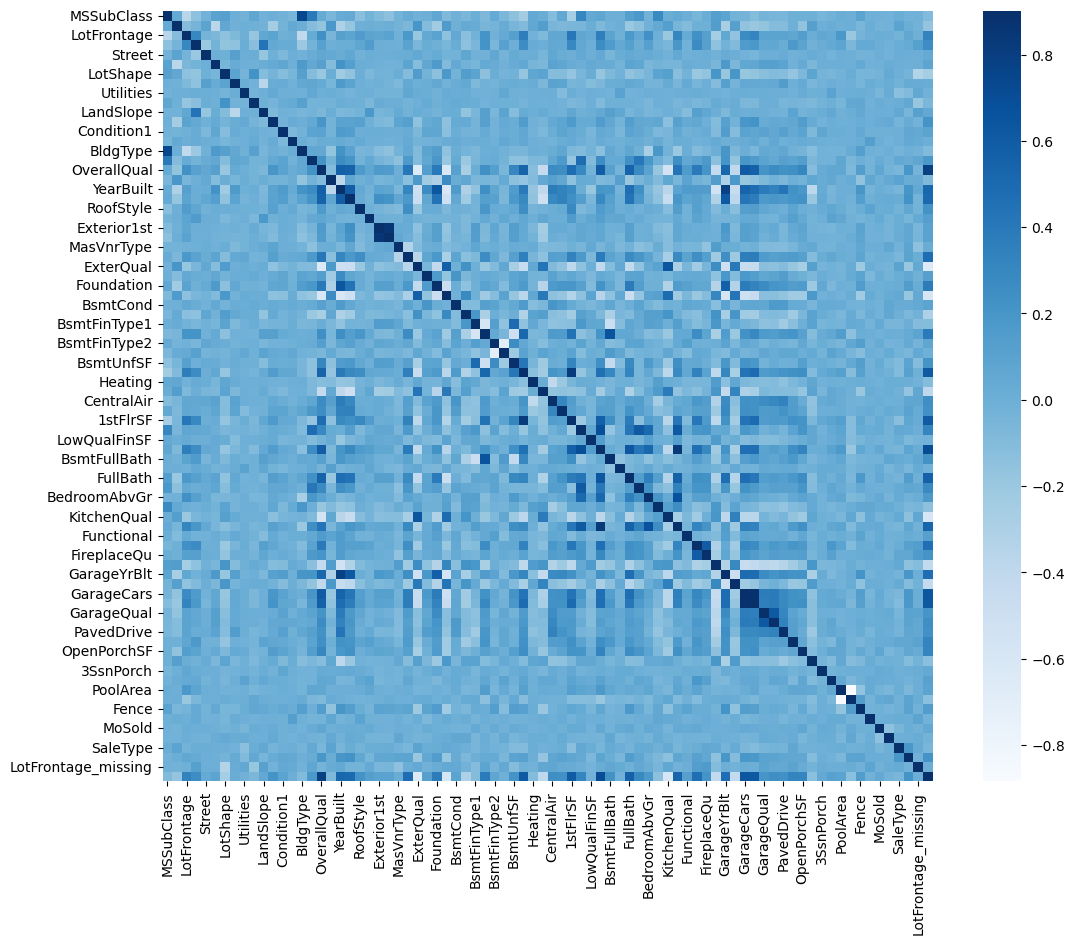

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = training.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

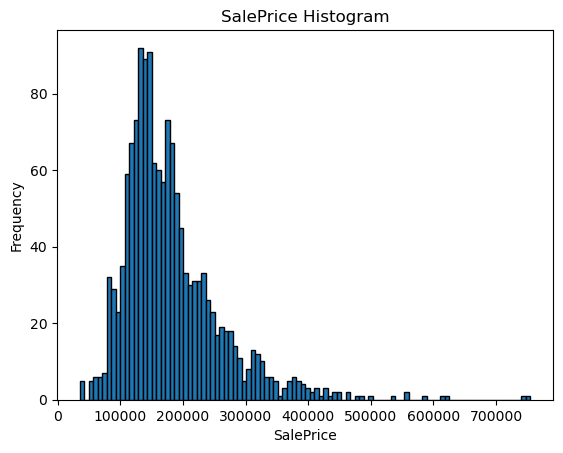

In [10]:
import matplotlib.pyplot as plt
# Plot the histogram
plt.hist(training['SalePrice'], bins=100, edgecolor='black')  # 'bins' controls the number of bins in the histogram
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('SalePrice Histogram')
plt.show()

In [11]:
import numpy as np
import scipy

data_mean = np.mean(y)
data_median = np.median(y)
data_mode = np.argmax(np.bincount(y))
data_std = np.std(y)
data_range = np.ptp(y)
data_skewness = scipy.stats.skew(y)
data_kurtosis = scipy.stats.kurtosis(y)

print("Mean:", data_mean)
print("Median:", data_median)
print("Mode:", data_mode)
print("Standard Deviation:", data_std)
print("Data Range:", data_range)
print("Skewness:", data_skewness)
print("Kurtosis:", data_kurtosis)

Mean: 180921.19589041095
Median: 163000.0
Mode: 140000
Standard Deviation: 79415.29188606751
Data Range: 720100
Skewness: 1.880940746034036
Kurtosis: 6.509812011089439


In [12]:
import pandas as pd

correlation_matrix = training.corr()
output_correlations = correlation_matrix['SalePrice']

top_10_correlated = output_correlations.abs().sort_values(ascending=False)[1:11]
top_10_correlated_columns = top_10_correlated.index
top_10_correlation_values = output_correlations[top_10_correlated_columns]

print("Top 10 Correlated Columns with sale price:")
print(top_10_correlation_values)

Top 10 Correlated Columns with sale price:
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
ExterQual     -0.636884
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
BsmtQual      -0.593734
KitchenQual   -0.589189
FullBath       0.560664
Name: SalePrice, dtype: float64


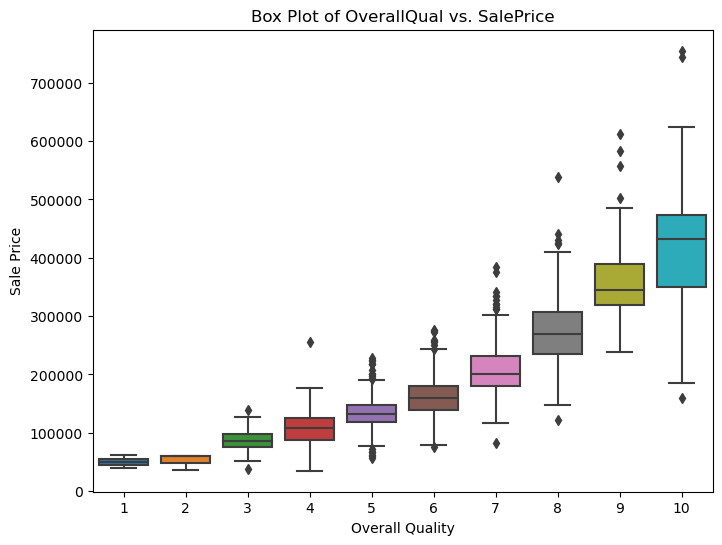

In [13]:
# Box plot for highly correlated data with output data i.e. SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=training[['OverallQual', 'SalePrice']])
plt.title('Box Plot of OverallQual vs. SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

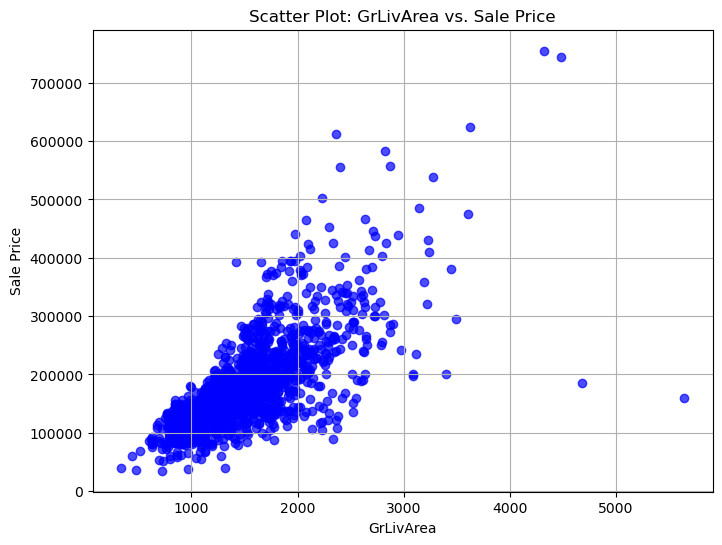

In [14]:
# Box plot for highly correlated data with output data i.e. SalePrice
plt.figure(figsize=(8, 6))
plt.scatter(training['GrLivArea'], training['SalePrice'], c='blue', alpha=0.7)
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.title('Scatter Plot: GrLivArea vs. Sale Price')
plt.grid(True)
plt.show()

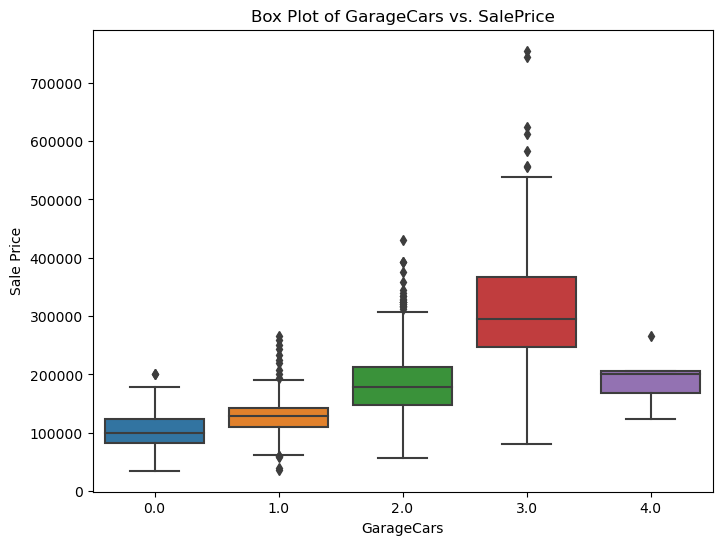

In [15]:
# Box plot for highly correlated data with output data i.e. SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=training[['GarageCars', 'SalePrice']])
plt.title('Box Plot of GarageCars vs. SalePrice')
plt.xlabel('GarageCars')
plt.ylabel('Sale Price')
plt.show()

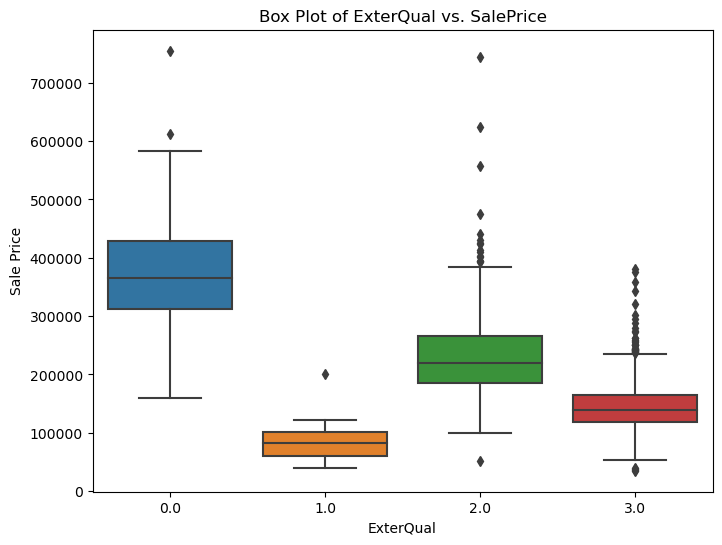

In [16]:
# Box plot for highly correlated data with output data i.e. SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='ExterQual', y='SalePrice', data=training[['ExterQual', 'SalePrice']])
plt.title('Box Plot of ExterQual vs. SalePrice')
plt.xlabel('ExterQual')
plt.ylabel('Sale Price')
plt.show()

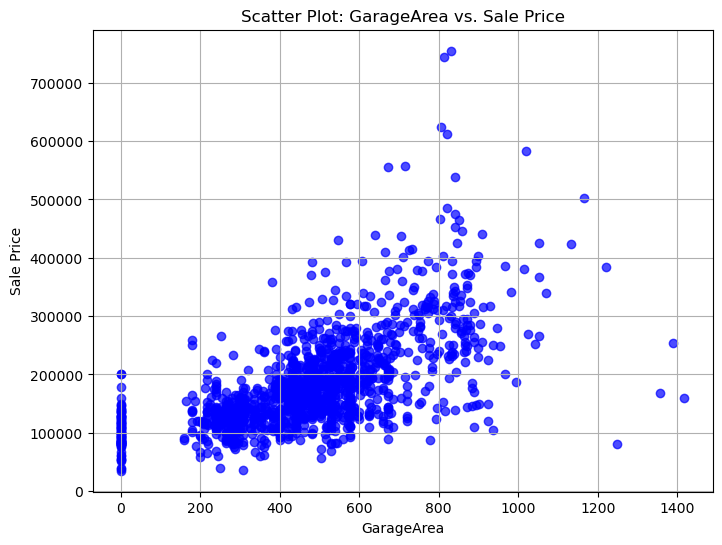

In [17]:
# Box plot for highly correlated data with output data i.e. SalePrice
plt.figure(figsize=(8, 6))
plt.scatter(training['GarageArea'], training['SalePrice'], c='blue', alpha=0.7)
plt.xlabel('GarageArea')
plt.ylabel('Sale Price')
plt.title('Scatter Plot: GarageArea vs. Sale Price')
plt.grid(True)
plt.show()

In [18]:
training.iloc[:, :80]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_missing,SalePrice
0,60,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,4.0,...,0,3.0,4.0,0,2,2008,8.0,4.0,0.0,208500
1,20,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,2.0,...,0,3.0,4.0,0,5,2007,8.0,4.0,0.0,181500
2,60,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,4.0,...,0,3.0,4.0,0,9,2008,8.0,4.0,0.0,223500
3,70,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,0.0,...,0,3.0,4.0,0,2,2006,8.0,0.0,0.0,140000
4,60,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,2.0,...,0,3.0,4.0,0,12,2008,8.0,4.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3.0,62.0,7917,1.0,1.0,3.0,3.0,0.0,4.0,...,0,3.0,4.0,0,8,2007,8.0,4.0,0.0,175000
1456,20,3.0,85.0,13175,1.0,1.0,3.0,3.0,0.0,4.0,...,0,3.0,2.0,0,2,2010,8.0,4.0,0.0,210000
1457,70,3.0,66.0,9042,1.0,1.0,3.0,3.0,0.0,4.0,...,0,3.0,0.0,2500,5,2010,8.0,4.0,0.0,266500
1458,20,3.0,68.0,9717,1.0,1.0,3.0,3.0,0.0,4.0,...,0,3.0,4.0,0,4,2010,8.0,4.0,0.0,142125


In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(np.array(training.iloc[:, :79]),training['SalePrice'], test_size=0.2, random_state=42)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
# XGBoost Model
import xgboost as xgb
xgbModel = xgb.XGBRegressor(n_estimators=3500, learning_rate=0.05, random_state=42)
xgbModel.fit(xtrain, ytrain)
xgbpred = xgbModel.predict(xtest)
mse = mean_squared_error(ytest, xgbpred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, xgbpred)
print('eXtreme Boost Regression Model')
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) score:", r2)

eXtreme Boost Regression Model
Mean Squared Error (MSE): 650040704.2765023
Root Mean Squared Error (RMSE): 25495.895832006026
R-squared (R2) score: 0.915252534674808


In [21]:
# Model Selection: xgboost
ypred = xgbModel.predict(np.array(testing))
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = ypred.astype(int)
submission.to_csv('/kaggle/working/Submission.csv', index=False)
submission

,Id,SalePrice
0,1461,125393
1,1462,154257
2,1463,182098
3,1464,191105
4,1465,200658
...,...,...
1454,2915,82194
1455,2916,85263
1456,2917,167526
1457,2918,123181
